In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import cv2
import random as rand
from os import listdir
import  os

In [14]:


class FrameData:
	def __init__(self, imgRGB,imgD,annotation2D,labels2D):
		self.imgRGB = imgRGB
		self.imgD = imgD
		self.annotation2D = annotation2D
		self.labels2D = labels2D
		
def readFrame( framePath, bfx ):
	#read RGB information to numpy array	
	rgbPath = framePath + "/image/" 
	rgbPath += listdir(rgbPath)[0]
	imgRGB = cv2.imread(rgbPath);
	
	#read depth information to numpy array
	if not(bfx):
		depthPath = framePath + "/depth/" 
	else:
		depthPath = framePath + "/depth_bfx/" 
	depthPath += listdir(depthPath)[0]
	imgD = cv2.imread(depthPath);
	
	#read 2D annotations to a list o numpy arrays where each index is related with one object polygon and a list where the index links the object polygon to the object label.
	anotation2D = framePath + "/annotation2Dfinal/index.json"
	
	with open(anotation2D) as data_file:    
		data = json.load(data_file)
			
	numberOfAnot = len(data["frames"][0]["polygon"]);
	
	anootation2D = [];
	labels2D = [];
	for i in range(0,numberOfAnot):
		x = data["frames"][0]["polygon"][i]["x"]
		y = data["frames"][0]["polygon"][i]["y"]

		idxObj = data["frames"][0]["polygon"][i]["object"];
		pts2 = np.array([x,y], np.int32)
		pts2 = np.transpose(pts2);
		anootation2D.append(pts2);
		
		labels2D.append([data['objects'][idxObj]["name"],idxObj])
		
	frameData = FrameData(imgRGB,imgD,anootation2D,labels2D)

	return frameData;

[['wall', 1], ['shelf', 0], ['shelf', 0], ['floor', 2], ['chair', 3], ['books', 4], ['books', 4], ['box', 5], ['books', 4]]
[[1. 1. 1. ... 2. 2. 2.]
 [1. 1. 1. ... 2. 2. 2.]
 [1. 1. 1. ... 2. 2. 2.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]
(427, 561)


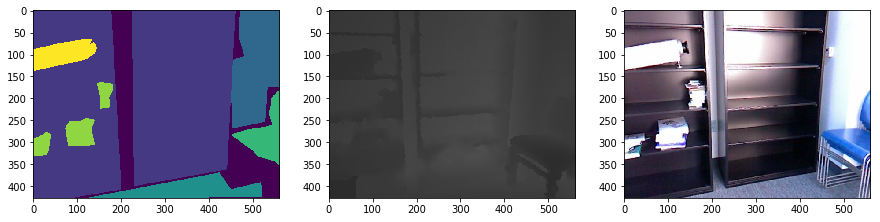

In [36]:

frameData = readFrame( "../dataset/SUNRGBD/SUNRGBD/kv1/b3dodata/img_0063/", True );
img_shape=np.shape(frameData.imgRGB)
imgRGBWithAnnotations = np.zeros([img_shape[0],img_shape[1]])#np.array(frameData.imgRGB, copy=True);

for i in range(0, len(frameData.annotation2D)):

	color =frameData.labels2D[i][1]+1 #[rand.randint(0,255), rand.randint(0,255), rand.randint(0,255)]
	# print(color)
	cv2.fillPoly(imgRGBWithAnnotations, [frameData.annotation2D[i]], color)

# for i in range(0, len(frameData.annotation2D)):	
# 	data = frameData.annotation2D[i];
# 	centroid = np.mean(data,axis=0)
# 	cv2.putText(imgRGBWithAnnotations, str(frameData.labels2D[i]), (int(centroid[0]), int(centroid[1])), cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,0,0],2)

print(frameData.labels2D)
fig = plt.figure(figsize=(15,5))
ax=fig.add_subplot(1,3,1)
ax.imshow(imgRGBWithAnnotations)
ax=fig.add_subplot(1,3,2)
ax.imshow(frameData.imgD)
ax=fig.add_subplot(1,3,3)
ax.imshow(frameData.imgRGB)

print(imgRGBWithAnnotations)
print(np.shape(imgRGBWithAnnotations))

# Create Mask Images
---

In [67]:
root="../dataset/SUNRGBD/SUNRGBD/kv1/b3dodata/"
img_dirs=listdir(root)
save_temp="mask"
for img_dir in img_dirs:
    frameData = readFrame( root+img_dir+"/", True );
    img_shape=np.shape(frameData.imgRGB)
    imgRGBWithAnnotations = np.zeros([img_shape[0],img_shape[1]])#np.array(frameData.imgRGB, copy=True);


    for i in range(0, len(frameData.annotation2D)):
        color =frameData.labels2D[i][1]+1 #[rand.randint(0,255), rand.randint(0,255), rand.randint(0,255)]
        # print(np.shape([frameData.annotation2D[i]]))
        if len(np.shape([frameData.annotation2D[i]]))<3:
            continue
        cv2.fillPoly(imgRGBWithAnnotations, [frameData.annotation2D[i]], color)
    
    #create save dir
    # print(np.max(imgRGBWithAnnotations))
    save_dir=f"{root}{img_dir}/{save_temp}"
    if not os.path.exists(save_dir):
        os.mkdir(save_dir)
    cv2.imwrite(f"{save_dir}/{save_temp}.png",imgRGBWithAnnotations)


6


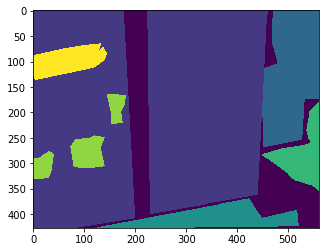

In [69]:
#show mask
p=root+img_dirs[0]+"/"+f"{save_temp}/{save_temp}.png"
im=cv2.imread(p,0)
print(np.max(im))
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.imshow(im)